In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_formats = ['svg']  # or svg
%matplotlib inline

dfn = pd.read_csv('/users/nhuvelle/Documents/Linear_Regression_Project/DATAFRAME.csv')
dfn.head()

,Unnamed: 0,Unnamed: 0.1,link_stub,Rank,Release,Total_Rank,Top_Rank,Overall_Rank,Year,Distributor,distributor,domestic_total_gross,widest,opening,budget,release_date,rating,runtime_minutes,genres
0,0,Sing,/release/rl2103150081/?ref_=bo_cso_table_1,1,Sing,"$270,395,425",2,110,2016,Universal Pictures\n\n,Universal PicturesSee full company information...,270395425,"4,029 theaters",35258145.0,75000000.0,2016-12-21,PG,108.0,"['Animation', 'Comedy', 'Family', 'Musical']"
1,2,Alvin and the Chipmunks: The Squeakquel,/release/rl1816364545/?ref_=bo_cso_table_3,3,Alvin and the Chipmunks: The Squeakquel,"$219,614,612",3,170,2009,Twentieth Century Fox\n\n,Twentieth Century FoxSee full company informat...,219614612,"3,747 theaters",48875415.0,75000000.0,2009-12-23,PG,88.0,"['Adventure', 'Animation', 'Comedy', 'Family',..."
2,3,Alvin and the Chipmunks,/release/rl1799587329/?ref_=bo_cso_table_4,4,Alvin and the Chipmunks,"$217,326,974",2,179,2007,Twentieth Century Fox\n\n,Twentieth Century FoxSee full company informat...,217326974,"3,499 theaters",44307417.0,60000000.0,2007-12-14,PG,92.0,"['Adventure', 'Animation', 'Comedy', 'Family',..."
3,4,A Star Is Born,/release/rl2164360705/?ref_=bo_cso_table_5,5,A Star Is Born,"$215,288,866",2,186,2018,Warner Bros.\n\n,Warner Bros.See full company information\n\n,215288866,"3,904 theaters",42908051.0,36000000.0,2018-10-05,R,136.0,"['Drama', 'Music', 'Romance']"
4,5,Sherlock Holmes,/release/rl3597567489/?ref_=bo_cso_table_6,6,Sherlock Holmes,"$209,028,679",2,199,2009,Warner Bros.\n\n,Warner Bros.See full company information\n\n,209028679,"3,626 theaters",62304277.0,90000000.0,2009-12-25,PG-13,128.0,"['Action', 'Adventure', 'Mystery']"


In [2]:
del dfn['Total_Rank']
del dfn['Overall_Rank']
del dfn['Rank']
del dfn['Unnamed: 0']
del dfn['link_stub']
del dfn['distributor']
del dfn['Unnamed: 0.1']
del dfn['Top_Rank']

In [3]:
dfn

,Release,Year,Distributor,domestic_total_gross,widest,opening,budget,release_date,rating,runtime_minutes,genres
0,Sing,2016,Universal Pictures\n\n,270395425,"4,029 theaters",35258145.0,75000000.0,2016-12-21,PG,108.0,"['Animation', 'Comedy', 'Family', 'Musical']"
1,Alvin and the Chipmunks: The Squeakquel,2009,Twentieth Century Fox\n\n,219614612,"3,747 theaters",48875415.0,75000000.0,2009-12-23,PG,88.0,"['Adventure', 'Animation', 'Comedy', 'Family',..."
2,Alvin and the Chipmunks,2007,Twentieth Century Fox\n\n,217326974,"3,499 theaters",44307417.0,60000000.0,2007-12-14,PG,92.0,"['Adventure', 'Animation', 'Comedy', 'Family',..."
3,A Star Is Born,2018,Warner Bros.\n\n,215288866,"3,904 theaters",42908051.0,36000000.0,2018-10-05,R,136.0,"['Drama', 'Music', 'Romance']"
4,Sherlock Holmes,2009,Warner Bros.\n\n,209028679,"3,626 theaters",62304277.0,90000000.0,2009-12-25,PG-13,128.0,"['Action', 'Adventure', 'Mystery']"
...,...,...,...,...,...,...,...,...,...,...,...
591,Windtalkers,2002,Metro-Goldwyn-Mayer (MGM)\n\n,40914068,"2,898 theaters",14520412.0,115000000.0,2002-06-14,R,134.0,"['Action', 'Drama', 'War']"
592,Little,2019,Universal Pictures\n\n,40860481,"2,667 theaters",15405455.0,20000000.0,2019-04-12,PG-13,109.0,"['Comedy', 'Fantasy', 'Romance']"
593,The Star,2017,Sony Pictures Entertainment (SPE)\n\n,40852824,"2,976 theaters",9812674.0,20000000.0,2017-11-17,PG,86.0,"['Adventure', 'Animation', 'Comedy', 'Family',..."
594,"Love, Simon",2018,Twentieth Century Fox\n\n,40826341,"2,434 theaters",11756244.0,17000000.0,2018-03-16,PG-13,110.0,"['Comedy', 'Drama', 'Romance']"


In [4]:
dfn['Distributor'] = dfn['Distributor'].replace({'\n\n':''}, regex=True)

In [5]:
dfn['widest'] = dfn['widest'].replace({'theaters':''}, regex=True)
dfn['widest'] = dfn['widest'].map(str.strip)
dfn['widest'] = dfn['widest'].replace({',':''}, regex=True)
dfn['widest'] = pd.to_numeric(dfn['widest'])

In [6]:
dfn['release_date'] = pd.to_datetime(dfn['release_date'])

In [7]:
def date_to_month(date):
    january = [1]
    february = [2]
    march = [3]
    april = [4]
    may = [5]
    june = [6]
    july = [7]
    august = [8]
    september = [9]
    october = [10]
    november = [11]
    december = [12]
    
    if date.month in january:
        return 'january'
    elif date.month in february:
        return 'february'
    elif date.month in march:
        return 'march'
    elif date.month in april:
        return 'april'
    elif date.month in may:
        return 'may'
    elif date.month in june:
        return 'june'
    elif date.month in july:
        return 'july'
    elif date.month in august:
        return 'august'
    elif date.month in september:
        return 'september'
    elif date.month in october:
        return 'october'
    elif date.month in november:
        return 'november'
    else:
        return 'december'

In [8]:
dfn['month'] = dfn['release_date'].apply(date_to_month)

In [9]:
dfn['profit'] = dfn['domestic_total_gross'] - dfn['budget']
dfn.head()

,Release,Year,Distributor,domestic_total_gross,widest,opening,budget,release_date,rating,runtime_minutes,genres,month,profit
0,Sing,2016,Universal Pictures,270395425,4029,35258145.0,75000000.0,2016-12-21,PG,108.0,"['Animation', 'Comedy', 'Family', 'Musical']",december,195395425.0
1,Alvin and the Chipmunks: The Squeakquel,2009,Twentieth Century Fox,219614612,3747,48875415.0,75000000.0,2009-12-23,PG,88.0,"['Adventure', 'Animation', 'Comedy', 'Family',...",december,144614612.0
2,Alvin and the Chipmunks,2007,Twentieth Century Fox,217326974,3499,44307417.0,60000000.0,2007-12-14,PG,92.0,"['Adventure', 'Animation', 'Comedy', 'Family',...",december,157326974.0
3,A Star Is Born,2018,Warner Bros.,215288866,3904,42908051.0,36000000.0,2018-10-05,R,136.0,"['Drama', 'Music', 'Romance']",october,179288866.0
4,Sherlock Holmes,2009,Warner Bros.,209028679,3626,62304277.0,90000000.0,2009-12-25,PG-13,128.0,"['Action', 'Adventure', 'Mystery']",december,119028679.0


In [10]:
dfn['Year'].describe()

count     596.000000
mean     2009.013423
std         6.923822
min      1978.000000
25%      2004.000000
50%      2010.000000
75%      2015.000000
max      2020.000000
Name: Year, dtype: float64

In [11]:
dfn = dfn[dfn['Year'] >= 1980]
dfn['Year'].describe()

count     595.000000
mean     2009.065546
std         6.811612
min      1990.000000
25%      2004.000000
50%      2010.000000
75%      2015.000000
max      2020.000000
Name: Year, dtype: float64

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline
import statsmodels.api as sm

sns.set(context='notebook', style='whitegrid', font_scale=1)
from sklearn.metrics import mean_squared_error, mean_absolute_error 

%config InlineBackend.figure_formats = ['svg']  # or svg

Populating the interactive namespace from numpy and matplotlib


In [13]:
ds = dfn.loc[:,['profit','Year','widest','opening','budget','runtime_minutes']]

In [14]:
sns.pairplot(ds)

<AxesSubplot:>

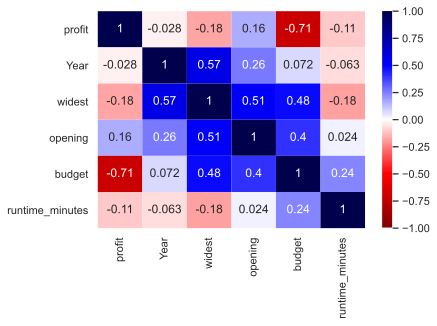

In [15]:
sns.heatmap(ds.corr(), cmap="seismic_r", annot=True, vmin=-1, vmax=1)

In [16]:
ds.corr()

,profit,Year,widest,opening,budget,runtime_minutes
profit,1.000000,-0.027871,-0.175317,0.159515,-0.705489,-0.106823
Year,-0.027871,1.000000,0.567590,0.257823,0.072142,-0.063012
widest,-0.175317,0.567590,1.000000,0.513297,0.477764,-0.184582
opening,0.159515,0.257823,0.513297,1.000000,0.398501,0.024140
budget,-0.705489,0.072142,0.477764,0.398501,1.000000,0.238653
runtime_minutes,-0.106823,-0.063012,-0.184582,0.024140,0.238653,1.000000


In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [18]:
def vif(df_X):
    '''
    Calculate the VIF for each feature of df_X (a Pandas DataFrame).
    '''
    vif_data = [variance_inflation_factor(df_X.values, i)
                for i in range(df_X.shape[1])]
    
    return pd.Series(vif_data, index=df_X.columns)

In [19]:
# VIF for predictors. Oof Year is high. But we're tight on features and prediction isn't a priority. Let's keep it.
vif(ds.iloc[:, 1:])

Year               116.085592
widest              61.009885
opening              8.801810
budget               4.760716
runtime_minutes     49.687575
dtype: float64

In [20]:
#Separate our features from our target

X = ds.loc[:,['Year','widest','opening','budget', 'runtime_minutes']]

y = ds['profit']

In [21]:
#Create a model using statsmodels
model = sm.OLS(y, sm.add_constant(X)) 

#Fit
fit = model.fit()

#Print out summary. p values look good! We can safely reject the null hypothesis. 
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     369.8
Date:                Fri, 09 Jul 2021   Prob (F-statistic):          5.33e-179
Time:                        00:27:24   Log-Likelihood:                -10914.
No. Observations:                 595   AIC:                         2.184e+04
Df Residuals:                     589   BIC:                         2.187e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.301e+09   3.44e+08      6.685      0.000    1.62e+09    2.98e+09
Year            -1.174e+06   1.74e+05     -6.745      0.000   -1.52e+06   -8.32e+05
widest           1.454e+04   2857.514      5.088      0.000    8926.915    2.02e+04
opening             2.6426      0.123     21.471      0.000       2.401       2.884
budget             -1.1086      0.029    -38.137      0.000      -1.166      -1.052
runtime_minutes  3.738e+05   5.93e+04      6.302      0.000    2.57e+05     4.9e+05
==============================================================================
Omnibus:                      267.583   Durbin-Watson:                   1.126
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1785.516
Skew:                           1.874   Prob(JB):                         0.00
Kurtosis:                      10.614   Cond. No.                     2.80e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.8e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
def split_and_validate(X, y):
    '''
    For a set of features and target X, y, perform a 80/20 train/val split, 
    fit and validate a linear regression model, and report results
    '''
    
    # perform train/val split. 
    X_train, X_val, y_train, y_val = \
        train_test_split(X, y, test_size=0.2, random_state=42)
    
    # fit linear regression to training data
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    
    # score fit model on validation data
    val_score = lr_model.score(X_val, y_val)
    
    # report results
    print('\nValidation R^2 score was:', val_score)
    print('Feature coefficient results: \n')
    for feature, coef in zip(X.columns, lr_model.coef_):
        print(feature, ':', f'{coef:.2f}') 
        

In [23]:
split_and_validate(X, y) #slight R^2 dip but not unexpected.


Validation R^2 score was: 0.7261136669336803
Feature coefficient results: 

Year : -1159712.46
widest : 14116.45
opening : 2.70
budget : -1.12
runtime_minutes : 396779.92


In [24]:
# Let's scale the years.
min_year = min(ds['Year']) 
ds['YearX'] = ds['Year'] - min_year  # turn year to age
ds['YearX^2'] = ds['YearX']**2  # polynomial term to add oomph to years. Time is our most scarce resource.

In [25]:
X['Year'] = ds['YearX^2']

#Create a model using statsmodels
model = sm.OLS(y, sm.add_constant(X)) 

#Fit
fit = model.fit()

#Print out summary. That didn't help!
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     360.8
Date:                Fri, 09 Jul 2021   Prob (F-statistic):          1.27e-176
Time:                        00:27:24   Log-Likelihood:                -10920.
No. Observations:                 595   AIC:                         2.185e+04
Df Residuals:                     589   BIC:                         2.188e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -4.005e+07   1.05e+07     -3.823      0.000   -6.06e+07   -1.95e+07
Year            -2.733e+04   4701.655     -5.813      0.000   -3.66e+04   -1.81e+04
widest           1.242e+04   2820.507      4.403      0.000    6879.723     1.8e+04
opening             2.6231      0.124     21.105      0.000       2.379       2.867
budget             -1.0999      0.029    -37.535      0.000      -1.157      -1.042
runtime_minutes  3.694e+05      6e+04      6.155      0.000    2.52e+05    4.87e+05
==============================================================================
Omnibus:                      269.448   Durbin-Watson:                   1.108
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1802.293
Skew:                           1.889   Prob(JB):                         0.00
Kurtosis:                      10.644   Cond. No.                     8.45e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.45e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
# win some lose some.
X = ds.loc[:,['Year','widest','opening','budget', 'runtime_minutes']]

y = ds['profit']

In [27]:
#interactions could be strong here
X2 = X.copy()

# multiplicative interaction
X2['budget*year'] = X2['budget'] * X2['Year']

# division interaction
X2['budget/runtime_minutes'] = X2['budget'] / X2['runtime_minutes']

split_and_validate(X2, y)


Validation R^2 score was: 0.7355822573574697
Feature coefficient results: 

Year : -1508833.67
widest : 13817.35
opening : 2.74
budget : -16.32
runtime_minutes : 787492.39
budget*year : 0.01
budget/runtime_minutes : 74.27


In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(context='notebook', style='whitegrid', font_scale=1.2)

In [33]:
small_dfn = dfn.loc[:,['widest','budget','Year', 'runtime_minutes','profit']]
small_dfn.describe()

,widest,budget,Year,runtime_minutes,profit
count,595.000000,5.950000e+02,595.000000,595.000000,5.950000e+02
mean,3025.539496,5.955613e+07,2009.065546,109.613445,1.474741e+07
std,529.857741,4.173705e+07,6.811612,17.434393,4.561536e+07
min,905.000000,1.200000e+06,1990.000000,72.000000,-1.769219e+08
25%,2722.000000,3.000000e+07,2004.000000,98.000000,-8.231264e+06
50%,3055.000000,5.000000e+07,2010.000000,107.000000,1.923406e+07
75%,3421.500000,8.000000e+07,2015.000000,118.000000,4.019228e+07
max,4268.000000,2.500000e+08,2020.000000,189.000000,1.953954e+08


In [34]:
#Separate our features from our target

X = small_dfn.loc[:, ['widest','budget','Year', 'runtime_minutes']]

y = small_dfn['profit']

In [35]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 595 entries, 0 to 595
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   widest           595 non-null    int64  
 1   budget           595 non-null    float64
 2   Year             595 non-null    int64  
 3   runtime_minutes  595 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 23.2 KB


In [36]:
#Split the data 60 - 20 - 20 train/val/test

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=43)

In [37]:
X_train.columns

Index(['widest', 'budget', 'Year', 'runtime_minutes'], dtype='object')

In [38]:
X_train.shape

(357, 4)

In [39]:
X_val.shape

(119, 4)

In [40]:
X_test.shape

(119, 4)

In [41]:

selected_columns = ['widest','budget','Year', 'runtime_minutes']

In [44]:
lasso_model = Lasso(alpha = 1000) # this is a VERY HIGH regularization strength!, wouldn't usually be used
lasso_model.fit(X_train.loc[:,selected_columns], y_train)

Lasso(alpha=1000)

In [45]:
list(zip(selected_columns, lasso_model.coef_))

[('widest', 34561.02630053202),
 ('budget', -1.000040405482697),
 ('Year', -1020107.7992136701),
 ('runtime_minutes', 544259.7460543143)]

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [48]:

std = StandardScaler()
std.fit(X_train.values)

StandardScaler()

In [49]:
X_tr = std.transform(X_train.values)

In [50]:
X_te = std.transform(X_test.values)

In [51]:
type(X_train), type(X_tr)

(pandas.core.frame.DataFrame, numpy.ndarray)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

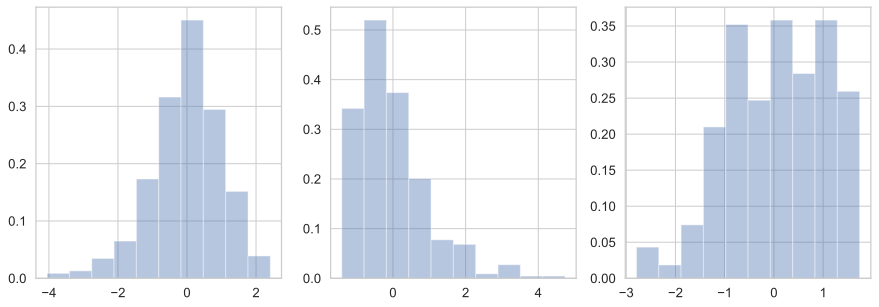

In [52]:
## Here we can plot histograms of a few transformed variables
## Note that they seem to have means of 0 and stddevs of 1
## (though they are not necessarily normally distributed)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.distplot(X_tr[:, 0], label='feature 1', ax=axes[0], kde=False, bins=10, norm_hist=True)
sns.distplot(X_tr[:, 1], label='feature 2', ax=axes[1], kde=False, bins=10, norm_hist=True)
sns.distplot(X_tr[:, 2], label='feature 3', ax=axes[2], kde=False, bins=10, norm_hist=True)

In [53]:
## Fit a LASSO model on the standardized data

lasso_model = Lasso(alpha = 10000)
lasso_model.fit(X_tr,y_train)

Lasso(alpha=10000)

In [54]:
list(zip(X_train.columns, lasso_model.coef_))

[('widest', 17678283.590496056),
 ('budget', -40466275.09073097),
 ('Year', -6716506.6190501945),
 ('runtime_minutes', 9664164.252747301)]

In [55]:
alphalist = 10**(np.linspace(-2,2,200))
err_vec_val = np.zeros(len(alphalist))
err_vec_train = np.zeros(len(alphalist))

for i,curr_alpha in enumerate(alphalist):

    # note the use of a new sklearn utility: Pipeline to pack
    # multiple modeling steps into one fitting process 
    steps = [('standardize', StandardScaler()), 
             ('lasso', Lasso(alpha = curr_alpha))]

    pipe = Pipeline(steps)
    pipe.fit(X_train.loc[:,selected_columns].values, y_train)
    
    val_set_pred = pipe.predict(X_val.loc[:,selected_columns].values)
    err_vec_val[i] = mae(y_val, val_set_pred)

NameError: name 'mae' is not defined